## USP - EACH - SIN5007 - Reconhecimento de Padrões - 1º SEM 2020

## Classificação de Modelos cardíacos tridimensionais relacionada à presença ou ausência de cardimiopatia


**Grupo H(8):** <br />
Diego Dedize <br />
Luiz Gustavo Silva <br />
Vagner Mendonça Gonçalves <br />

version 0.2 - 16/04/2020

**Objetivo:** aplicar modelos de classificação  e avaliar os resultados obtidos em um dataset composto por vetores de características extraídas de modelos 3D reconstruídos a partir de exames de Ressonancia Magnética Cardíaca (RMC).

**Cardiomiopatia:** quadro clínico dado por uma anormalidade no miocárdio (estrutura muscular do coração) (KUMAR et al., 2010 apud BERGAMASCO, 2018).

**Fonte dos dados:** Dataset disponibilizado pelo Laboratório de Aplicações de Informática em Saúde (LApIS) - EACH/USP, coordenado pela Profa. Dra. Fátima L. S. Nunes.

**Referências:** <br />
BERGAMASCO, Leila Cristina Carneiro. Recuperação de imagens cardíacas tridimensionais por conteúdo. 2013. 134 f. Dissertação (Mestrado em Ciências) - Programa de Pós-graduação em Sistemas de Informação, Escola de Artes, Ciências e Humanidades, Universidade de São Paulo, São Paulo, 2013. 

BERGAMASCO, Leila Cristina Carneiro. Recuperação de objetos médicos 3D utilizando harmônicos esféricos e redes de fluxo. 2018. 181 f. Tese (Doutorado em Ciências) - Escola Politécnica, Departamento de Engenharia da Computação e Sistemas Digitais, Universidade de São Paulo, São Paulo, 2018.

KUMAR, V.; ABBAS, A. K.; FAUSTO, N.; ASTER, J. C.. Robbins & Cotran – Patologia: Bases Patológicas das Doenças. 8 ed. Rio de Janeiro: Elsevier, 2010.


# Importanto bibliotecas importantes

In [1]:
%matplotlib inline
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)



# Importando arquivos

In [2]:
df_lu = pd.read_csv("../ARQUIVOS_FINAIS/CMCT_20200503.csv")
df_lu.head(3)

#Joga o target para ultima posicao
df_1_ = df_lu.iloc[:,:5]


df_2_ = df_lu.iloc[:,6:]
df_3_ = pd.concat([df_1_,df_2_],axis=1)

df_targ = df_lu[['TARGET']]

df_4_ = pd.concat([df_3_,df_targ],axis=1)

df_lu = df_4_
df_lu.head()

,id,idade,sexo,volume,massa,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,EDLEndo06,EDLEndo07,EDLEndo08,EDLEpi01,EDLEpi02,EDLEpi03,EDLEpi04,EDLEpi05,EDLEpi06,EDLEpi07,EDLEpi08,EDLTotal01,EDLTotal02,EDLTotal03,EDLTotal04,EDLTotal05,EDLTotal06,EDLTotal07,EDLTotal08,HoughEndo,HoughEpi,HoughParede,OctEndoL0001,OctEndoL0002,OctEndoL0003,OctEndoL0004,OctEndoL0005,OctEndoL0006,OctEndoL0007,OctEndoL0008,OctEndoL0101,OctEndoL0102,OctEndoL0103,OctEndoL0104,OctEndoL0105,OctEndoL0106,OctEndoL0107,OctEndoL0108,OctEndoL0201,OctEndoL0202,OctEndoL0203,OctEndoL0204,OctEndoL0205,OctEndoL0206,OctEndoL0207,OctEndoL0208,OctEndoL0301,OctEndoL0302,OctEndoL0303,OctEndoL0304,OctEndoL0305,OctEndoL0306,OctEndoL0307,OctEndoL0308,OctEndoL0401,OctEndoL0402,OctEndoL0403,OctEndoL0404,OctEndoL0405,OctEndoL0406,OctEndoL0407,OctEndoL0408,OctEndoL0501,OctEndoL0502,OctEndoL0503,OctEndoL0504,OctEndoL0505,OctEndoL0506,OctEndoL0507,OctEndoL0508,OctEndoL0601,OctEndoL0602,OctEndoL0603,OctEndoL0604,OctEndoL0605,OctEndoL0606,OctEndoL0607,OctEndoL0608,OctEndoL0701,OctEndoL0702,OctEndoL0703,OctEndoL0704,OctEndoL0705,OctEndoL0706,OctEndoL0707,OctEndoL0708,OctEndoL0801,OctEndoL0802,OctEndoL0803,OctEndoL0804,OctEndoL0805,OctEndoL0806,OctEndoL0807,OctEndoL0808,OctEndoL0901,OctEndoL0902,OctEndoL0903,OctEndoL0904,OctEndoL0905,OctEndoL0906,OctEndoL0907,OctEndoL0908,OctEndoL1001,OctEndoL1002,OctEndoL1003,OctEndoL1004,OctEndoL1005,OctEndoL1006,OctEndoL1007,OctEndoL1008,OctEpiL0001,OctEpiL0002,OctEpiL0003,OctEpiL0004,OctEpiL0005,OctEpiL0006,OctEpiL0007,OctEpiL0008,OctEpiL0101,OctEpiL0102,OctEpiL0103,OctEpiL0104,OctEpiL0105,OctEpiL0106,OctEpiL0107,OctEpiL0108,OctEpiL0201,OctEpiL0202,OctEpiL0203,OctEpiL0204,OctEpiL0205,OctEpiL0206,OctEpiL0207,OctEpiL0208,OctEpiL0301,OctEpiL0302,OctEpiL0303,OctEpiL0304,OctEpiL0305,OctEpiL0306,OctEpiL0307,OctEpiL0308,OctEpiL0401,OctEpiL0402,OctEpiL0403,OctEpiL0404,OctEpiL0405,OctEpiL0406,OctEpiL0407,OctEpiL0408,OctEpiL0501,OctEpiL0502,OctEpiL0503,OctEpiL0504,OctEpiL0505,OctEpiL0506,OctEpiL0507,OctEpiL0508,OctEpiL0601,OctEpiL0602,OctEpiL0603,OctEpiL0604,OctEpiL0605,OctEpiL0606,OctEpiL0607,OctEpiL0608,OctEpiL0701,OctEpiL0702,OctEpiL0703,OctEpiL0704,OctEpiL0705,OctEpiL0706,OctEpiL0707,OctEpiL0708,OctEpiL0801,OctEpiL0802,OctEpiL0803,OctEpiL0804,OctEpiL0805,OctEpiL0806,OctEpiL0807,OctEpiL0808,OctEpiL0901,OctEpiL0902,OctEpiL0903,OctEpiL0904,OctEpiL0905,OctEpiL0906,OctEpiL0907,OctEpiL0908,OctEpiL1001,OctEpiL1002,OctEpiL1003,OctEpiL1004,OctEpiL1005,OctEpiL1006,OctEpiL1007,OctEpiL1008,OctParedeL0001,OctParedeL0002,OctParedeL0003,OctParedeL0004,OctParedeL0005,OctParedeL0006,OctParedeL0007,OctParedeL0008,OctParedeL0101,OctParedeL0102,OctParedeL0103,OctParedeL0104,OctParedeL0105,OctParedeL0106,OctParedeL0107,OctParedeL0108,OctParedeL0201,OctParedeL0202,OctParedeL0203,OctParedeL0204,OctParedeL0205,OctParedeL0206,OctParedeL0207,OctParedeL0208,OctParedeL0301,OctParedeL0302,OctParedeL0303,OctParedeL0304,OctParedeL0305,OctParedeL0306,OctParedeL0307,OctParedeL0308,OctParedeL0401,OctParedeL0402,OctParedeL0403,OctParedeL0404,OctParedeL0405,OctParedeL0406,OctParedeL0407,OctParedeL0408,OctParedeL0501,OctParedeL0502,OctParedeL0503,OctParedeL0504,OctParedeL0505,OctParedeL0506,OctParedeL0507,OctParedeL0508,OctParedeL0601,OctParedeL0602,OctParedeL0603,OctParedeL0604,OctParedeL0605,OctParedeL0606,OctParedeL0607,OctParedeL0608,OctParedeL0701,OctParedeL0702,OctParedeL0703,OctParedeL0704,OctParedeL0705,OctParedeL0706,OctParedeL0707,OctParedeL0708,OctParedeL0801,OctParedeL0802,OctParedeL0803,OctParedeL0804,OctParedeL0805,OctParedeL0806,OctParedeL0807,OctParedeL0808,OctParedeL0901,OctParedeL0902,OctParedeL0903,OctParedeL0904,OctParedeL0905,OctParedeL0906,OctParedeL0907,OctParedeL0908,OctParedeL1001,OctParedeL1002,OctParedeL1003,OctParedeL1004,OctParedeL1005,OctParedeL1006,OctParedeL1007,OctParedeL1008,TotalEndoSpharmL00,TotalEndoSpharmL01,TotalEndoSpharmL02,TotalEndoSpharmL03,TotalEndoSpharmL04,TotalEndoSpharmL05,TotalEndoSpharmL06,TotalEndoSpharmL07,TotalEndoSpharmL08,TotalEndoS

### Verifica missings

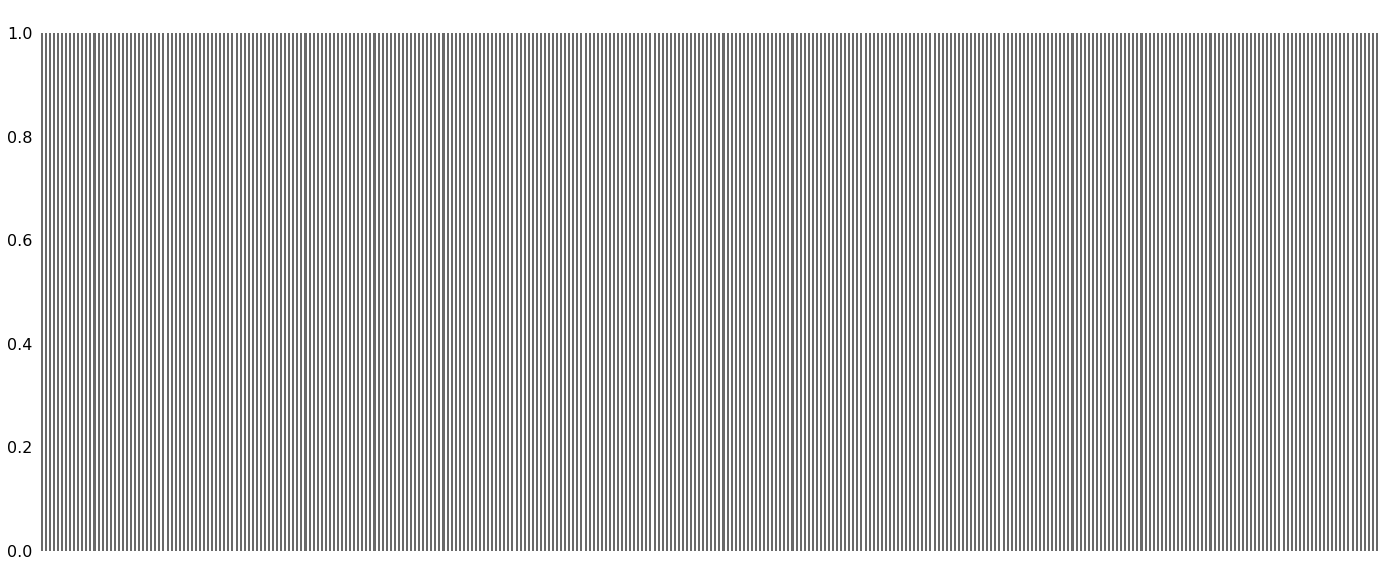

In [3]:
#Todas as variaveis estão preenchidas

#Verifica % de missing por coluna
dados_vazios = (df_lu.isnull().sum()/len(df_lu['id']))*100
dados_vazios

msno.bar(df_lu)

### Neste ponto traduzimos as classes de acordo com os parametros indicados na apresentação 1
Registros de 1 a 101 a classe é NORMAL <br />
Registros de 102 a 218 a classe é CARDIMIOPATIA DILATADA <br />
Registros de 219 a 401 a classe é  CARTIDIOPATIA HIPERTRÓFICA <br />

In [4]:
for ind, row in df_lu.iterrows():
    if (df_lu.loc[ind,'TARGET']==0): df_lu.loc[ind,'class_desc'] = 'normal'
    if (df_lu.loc[ind,'TARGET']==1): df_lu.loc[ind,'class_desc'] = 'CMH'
    if (df_lu.loc[ind,'TARGET']==2): df_lu.loc[ind,'class_desc'] = 'CMD'

#Verifica a quantidade de cada classe
df_lu['class_desc'].value_counts()

#df_pac.dtypes
#df_lu.head(3)

CMH       183
CMD       116
normal    101
Name: class_desc, dtype: int64

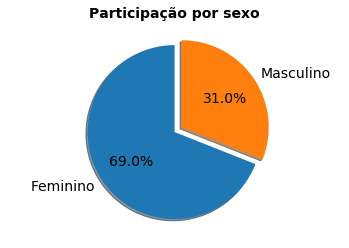

Valores absolutos:


1    276
0    124
Name: sexo, dtype: int64

In [5]:
#Sabemos que sexo é uma variavel importante (conforme pesquisa Fonte), portanto esse 
#desbalanceamento pode ser um problema. Vamos acompanhar ao longo do processo
TOTAL = df_lu.sexo.value_counts()
total_M = TOTAL[1]
total_F = TOTAL[0]

valores = [total_M,total_F]
series = ['Feminino','Masculino']

plt.axis('equal')
plt.rcParams.update({'font.size':14})
plt.rcParams["figure.figsize"] = [5,4]

plt.pie(valores,labels=series,autopct='%1.1f%%',
        explode=(0,0.1),shadow = True,startangle=90,)

plt.title("Participação por sexo",size=14,weight='demibold')
plt.show()

print('Valores absolutos:')
df_lu['sexo'].value_counts()

# Definição das classes utilizadas dataset

#### Dado que o numero de observações entre "sem cardiomiopatia" e "com cardimiopatia (em caso de soma CDM+CMH") ficaria desbalanceado, optamos por trabalhar com as classes nomal e CMD

In [6]:
#Verifica a quantidade de cada classe
df_final = df_lu
#df_final['class_desc'].value_counts()

#Determinando quais classes uremos utilizar
df_final_1 = df_final[df_final['TARGET']!=1]

df_final_3 = df_final_1

df_final_1['TARGET'].value_counts()

2    116
0    101
Name: TARGET, dtype: int64

### Deleta campos que não vamos utilizar

In [7]:
df_final_4 = df_final_3.drop(['class_desc'],axis = 1)
df_final_4 = df_final_4.drop(['id'],axis = 1)
df_final_4.head(3)

,idade,sexo,volume,massa,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,EDLEndo06,EDLEndo07,EDLEndo08,EDLEpi01,EDLEpi02,EDLEpi03,EDLEpi04,EDLEpi05,EDLEpi06,EDLEpi07,EDLEpi08,EDLTotal01,EDLTotal02,EDLTotal03,EDLTotal04,EDLTotal05,EDLTotal06,EDLTotal07,EDLTotal08,HoughEndo,HoughEpi,HoughParede,OctEndoL0001,OctEndoL0002,OctEndoL0003,OctEndoL0004,OctEndoL0005,OctEndoL0006,OctEndoL0007,OctEndoL0008,OctEndoL0101,OctEndoL0102,OctEndoL0103,OctEndoL0104,OctEndoL0105,OctEndoL0106,OctEndoL0107,OctEndoL0108,OctEndoL0201,OctEndoL0202,OctEndoL0203,OctEndoL0204,OctEndoL0205,OctEndoL0206,OctEndoL0207,OctEndoL0208,OctEndoL0301,OctEndoL0302,OctEndoL0303,OctEndoL0304,OctEndoL0305,OctEndoL0306,OctEndoL0307,OctEndoL0308,OctEndoL0401,OctEndoL0402,OctEndoL0403,OctEndoL0404,OctEndoL0405,OctEndoL0406,OctEndoL0407,OctEndoL0408,OctEndoL0501,OctEndoL0502,OctEndoL0503,OctEndoL0504,OctEndoL0505,OctEndoL0506,OctEndoL0507,OctEndoL0508,OctEndoL0601,OctEndoL0602,OctEndoL0603,OctEndoL0604,OctEndoL0605,OctEndoL0606,OctEndoL0607,OctEndoL0608,OctEndoL0701,OctEndoL0702,OctEndoL0703,OctEndoL0704,OctEndoL0705,OctEndoL0706,OctEndoL0707,OctEndoL0708,OctEndoL0801,OctEndoL0802,OctEndoL0803,OctEndoL0804,OctEndoL0805,OctEndoL0806,OctEndoL0807,OctEndoL0808,OctEndoL0901,OctEndoL0902,OctEndoL0903,OctEndoL0904,OctEndoL0905,OctEndoL0906,OctEndoL0907,OctEndoL0908,OctEndoL1001,OctEndoL1002,OctEndoL1003,OctEndoL1004,OctEndoL1005,OctEndoL1006,OctEndoL1007,OctEndoL1008,OctEpiL0001,OctEpiL0002,OctEpiL0003,OctEpiL0004,OctEpiL0005,OctEpiL0006,OctEpiL0007,OctEpiL0008,OctEpiL0101,OctEpiL0102,OctEpiL0103,OctEpiL0104,OctEpiL0105,OctEpiL0106,OctEpiL0107,OctEpiL0108,OctEpiL0201,OctEpiL0202,OctEpiL0203,OctEpiL0204,OctEpiL0205,OctEpiL0206,OctEpiL0207,OctEpiL0208,OctEpiL0301,OctEpiL0302,OctEpiL0303,OctEpiL0304,OctEpiL0305,OctEpiL0306,OctEpiL0307,OctEpiL0308,OctEpiL0401,OctEpiL0402,OctEpiL0403,OctEpiL0404,OctEpiL0405,OctEpiL0406,OctEpiL0407,OctEpiL0408,OctEpiL0501,OctEpiL0502,OctEpiL0503,OctEpiL0504,OctEpiL0505,OctEpiL0506,OctEpiL0507,OctEpiL0508,OctEpiL0601,OctEpiL0602,OctEpiL0603,OctEpiL0604,OctEpiL0605,OctEpiL0606,OctEpiL0607,OctEpiL0608,OctEpiL0701,OctEpiL0702,OctEpiL0703,OctEpiL0704,OctEpiL0705,OctEpiL0706,OctEpiL0707,OctEpiL0708,OctEpiL0801,OctEpiL0802,OctEpiL0803,OctEpiL0804,OctEpiL0805,OctEpiL0806,OctEpiL0807,OctEpiL0808,OctEpiL0901,OctEpiL0902,OctEpiL0903,OctEpiL0904,OctEpiL0905,OctEpiL0906,OctEpiL0907,OctEpiL0908,OctEpiL1001,OctEpiL1002,OctEpiL1003,OctEpiL1004,OctEpiL1005,OctEpiL1006,OctEpiL1007,OctEpiL1008,OctParedeL0001,OctParedeL0002,OctParedeL0003,OctParedeL0004,OctParedeL0005,OctParedeL0006,OctParedeL0007,OctParedeL0008,OctParedeL0101,OctParedeL0102,OctParedeL0103,OctParedeL0104,OctParedeL0105,OctParedeL0106,OctParedeL0107,OctParedeL0108,OctParedeL0201,OctParedeL0202,OctParedeL0203,OctParedeL0204,OctParedeL0205,OctParedeL0206,OctParedeL0207,OctParedeL0208,OctParedeL0301,OctParedeL0302,OctParedeL0303,OctParedeL0304,OctParedeL0305,OctParedeL0306,OctParedeL0307,OctParedeL0308,OctParedeL0401,OctParedeL0402,OctParedeL0403,OctParedeL0404,OctParedeL0405,OctParedeL0406,OctParedeL0407,OctParedeL0408,OctParedeL0501,OctParedeL0502,OctParedeL0503,OctParedeL0504,OctParedeL0505,OctParedeL0506,OctParedeL0507,OctParedeL0508,OctParedeL0601,OctParedeL0602,OctParedeL0603,OctParedeL0604,OctParedeL0605,OctParedeL0606,OctParedeL0607,OctParedeL0608,OctParedeL0701,OctParedeL0702,OctParedeL0703,OctParedeL0704,OctParedeL0705,OctParedeL0706,OctParedeL0707,OctParedeL0708,OctParedeL0801,OctParedeL0802,OctParedeL0803,OctParedeL0804,OctParedeL0805,OctParedeL0806,OctParedeL0807,OctParedeL0808,OctParedeL0901,OctParedeL0902,OctParedeL0903,OctParedeL0904,OctParedeL0905,OctParedeL0906,OctParedeL0907,OctParedeL0908,OctParedeL1001,OctParedeL1002,OctParedeL1003,OctParedeL1004,OctParedeL1005,OctParedeL1006,OctParedeL1007,OctParedeL1008,TotalEndoSpharmL00,TotalEndoSpharmL01,TotalEndoSpharmL02,TotalEndoSpharmL03,TotalEndoSpharmL04,TotalEndoSpharmL05,TotalEndoSpharmL06,TotalEndoSpharmL07,TotalEndoSpharmL08,TotalEndoSpha

In [8]:
#exporta dataset final
df_final_4.to_csv("../RESULTADOS/df_final_20200510.csv", index = False)

# Inicio após exportação

In [9]:
df_final_5 = pd.read_csv("../RESULTADOS/df_final_20200510.csv")
pd.set_option('display.max_columns',329)

#df_final_5.shape
#df_final_5.head(3)


#Verifica correlação
# sns.heatmap(df_final_5.corr(), annot = True, fmt = '.2f', cmap='Blues')
# plt.title('Correlação features')
# plt.show()

#AJUSTA O DATASET QUE IRÁ UTILIZAR PARA FAZER O PCA
pca_1 = df_final_5
pca_1.head(3)

,idade,sexo,volume,massa,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,EDLEndo06,EDLEndo07,EDLEndo08,EDLEpi01,EDLEpi02,EDLEpi03,EDLEpi04,EDLEpi05,EDLEpi06,EDLEpi07,EDLEpi08,EDLTotal01,EDLTotal02,EDLTotal03,EDLTotal04,EDLTotal05,EDLTotal06,EDLTotal07,EDLTotal08,HoughEndo,HoughEpi,HoughParede,OctEndoL0001,OctEndoL0002,OctEndoL0003,OctEndoL0004,OctEndoL0005,OctEndoL0006,OctEndoL0007,OctEndoL0008,OctEndoL0101,OctEndoL0102,OctEndoL0103,OctEndoL0104,OctEndoL0105,OctEndoL0106,OctEndoL0107,OctEndoL0108,OctEndoL0201,OctEndoL0202,OctEndoL0203,OctEndoL0204,OctEndoL0205,OctEndoL0206,OctEndoL0207,OctEndoL0208,OctEndoL0301,OctEndoL0302,OctEndoL0303,OctEndoL0304,OctEndoL0305,OctEndoL0306,OctEndoL0307,OctEndoL0308,OctEndoL0401,OctEndoL0402,OctEndoL0403,OctEndoL0404,OctEndoL0405,OctEndoL0406,OctEndoL0407,OctEndoL0408,OctEndoL0501,OctEndoL0502,OctEndoL0503,OctEndoL0504,OctEndoL0505,OctEndoL0506,OctEndoL0507,OctEndoL0508,OctEndoL0601,OctEndoL0602,OctEndoL0603,OctEndoL0604,OctEndoL0605,OctEndoL0606,OctEndoL0607,OctEndoL0608,OctEndoL0701,OctEndoL0702,OctEndoL0703,OctEndoL0704,OctEndoL0705,OctEndoL0706,OctEndoL0707,OctEndoL0708,OctEndoL0801,OctEndoL0802,OctEndoL0803,OctEndoL0804,OctEndoL0805,OctEndoL0806,OctEndoL0807,OctEndoL0808,OctEndoL0901,OctEndoL0902,OctEndoL0903,OctEndoL0904,OctEndoL0905,OctEndoL0906,OctEndoL0907,OctEndoL0908,OctEndoL1001,OctEndoL1002,OctEndoL1003,OctEndoL1004,OctEndoL1005,OctEndoL1006,OctEndoL1007,OctEndoL1008,OctEpiL0001,OctEpiL0002,OctEpiL0003,OctEpiL0004,OctEpiL0005,OctEpiL0006,OctEpiL0007,OctEpiL0008,OctEpiL0101,OctEpiL0102,OctEpiL0103,OctEpiL0104,OctEpiL0105,OctEpiL0106,OctEpiL0107,OctEpiL0108,OctEpiL0201,OctEpiL0202,OctEpiL0203,OctEpiL0204,OctEpiL0205,OctEpiL0206,OctEpiL0207,OctEpiL0208,OctEpiL0301,OctEpiL0302,OctEpiL0303,OctEpiL0304,OctEpiL0305,OctEpiL0306,OctEpiL0307,OctEpiL0308,OctEpiL0401,OctEpiL0402,OctEpiL0403,OctEpiL0404,OctEpiL0405,OctEpiL0406,OctEpiL0407,OctEpiL0408,OctEpiL0501,OctEpiL0502,OctEpiL0503,OctEpiL0504,OctEpiL0505,OctEpiL0506,OctEpiL0507,OctEpiL0508,OctEpiL0601,OctEpiL0602,OctEpiL0603,OctEpiL0604,OctEpiL0605,OctEpiL0606,OctEpiL0607,OctEpiL0608,OctEpiL0701,OctEpiL0702,OctEpiL0703,OctEpiL0704,OctEpiL0705,OctEpiL0706,OctEpiL0707,OctEpiL0708,OctEpiL0801,OctEpiL0802,OctEpiL0803,OctEpiL0804,OctEpiL0805,OctEpiL0806,OctEpiL0807,OctEpiL0808,OctEpiL0901,OctEpiL0902,OctEpiL0903,OctEpiL0904,OctEpiL0905,OctEpiL0906,OctEpiL0907,OctEpiL0908,OctEpiL1001,OctEpiL1002,OctEpiL1003,OctEpiL1004,OctEpiL1005,OctEpiL1006,OctEpiL1007,OctEpiL1008,OctParedeL0001,OctParedeL0002,OctParedeL0003,OctParedeL0004,OctParedeL0005,OctParedeL0006,OctParedeL0007,OctParedeL0008,OctParedeL0101,OctParedeL0102,OctParedeL0103,OctParedeL0104,OctParedeL0105,OctParedeL0106,OctParedeL0107,OctParedeL0108,OctParedeL0201,OctParedeL0202,OctParedeL0203,OctParedeL0204,OctParedeL0205,OctParedeL0206,OctParedeL0207,OctParedeL0208,OctParedeL0301,OctParedeL0302,OctParedeL0303,OctParedeL0304,OctParedeL0305,OctParedeL0306,OctParedeL0307,OctParedeL0308,OctParedeL0401,OctParedeL0402,OctParedeL0403,OctParedeL0404,OctParedeL0405,OctParedeL0406,OctParedeL0407,OctParedeL0408,OctParedeL0501,OctParedeL0502,OctParedeL0503,OctParedeL0504,OctParedeL0505,OctParedeL0506,OctParedeL0507,OctParedeL0508,OctParedeL0601,OctParedeL0602,OctParedeL0603,OctParedeL0604,OctParedeL0605,OctParedeL0606,OctParedeL0607,OctParedeL0608,OctParedeL0701,OctParedeL0702,OctParedeL0703,OctParedeL0704,OctParedeL0705,OctParedeL0706,OctParedeL0707,OctParedeL0708,OctParedeL0801,OctParedeL0802,OctParedeL0803,OctParedeL0804,OctParedeL0805,OctParedeL0806,OctParedeL0807,OctParedeL0808,OctParedeL0901,OctParedeL0902,OctParedeL0903,OctParedeL0904,OctParedeL0905,OctParedeL0906,OctParedeL0907,OctParedeL0908,OctParedeL1001,OctParedeL1002,OctParedeL1003,OctParedeL1004,OctParedeL1005,OctParedeL1006,OctParedeL1007,OctParedeL1008,TotalEndoSpharmL00,TotalEndoSpharmL01,TotalEndoSpharmL02,TotalEndoSpharmL03,TotalEndoSpharmL04,TotalEndoSpharmL05,TotalEndoSpharmL06,TotalEndoSpharmL07,TotalEndoSpharmL08,TotalEndoSpha

# Seleção de caracteristicas por meio de PCA

Neste ponto fizemos alguns testes para verificar qual é o melhor número de componentes principais que poderiamos utilizar de forma que garantissemos a maior taxa de variação explicada acumulada e tivessemos uma redução de dimensionalidade significativa.
Efetuamos os seguintes passos:
- 1 Visualização em 2d (2 componentes principais) e apuramos a taxa de variação explicada;
- 2 Visualização em 3d (3 componentes principais) e apuramos a taxa de variação explicada;
- 3 Verificação de numeros de componentes principais x variância explicada acumulada. Neste ponto conseguimos determinar qual é o    numero de componentes que iremos utilizar em nosso trabalho.

In [10]:
# Separando as fetures por abordagem (define features por abordagem e seta o df da abordagem atual)
abordagem_1 = pca_1.columns[0:-1]
#abordagem_2 = ['idade', 'sexo','volume','massa','HoughEndo','HoughEpi','HoughParede']

##abordagem 3 
#abordagem_3 = ['idade', 'sexo','volume','massa']

#Utiliza a abordagem para selecionar as features
abordagem = abordagem_1
feat = abordagem

colunas = feat
df_atual = pca_1.loc[:, colunas]
df_atual = pd.concat([df_atual,pca_1['TARGET']],axis=1)
df_atual.head(3)

,idade,sexo,volume,massa,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,EDLEndo06,EDLEndo07,EDLEndo08,EDLEpi01,EDLEpi02,EDLEpi03,EDLEpi04,EDLEpi05,EDLEpi06,EDLEpi07,EDLEpi08,EDLTotal01,EDLTotal02,EDLTotal03,EDLTotal04,EDLTotal05,EDLTotal06,EDLTotal07,EDLTotal08,HoughEndo,HoughEpi,HoughParede,OctEndoL0001,OctEndoL0002,OctEndoL0003,OctEndoL0004,OctEndoL0005,OctEndoL0006,OctEndoL0007,OctEndoL0008,OctEndoL0101,OctEndoL0102,OctEndoL0103,OctEndoL0104,OctEndoL0105,OctEndoL0106,OctEndoL0107,OctEndoL0108,OctEndoL0201,OctEndoL0202,OctEndoL0203,OctEndoL0204,OctEndoL0205,OctEndoL0206,OctEndoL0207,OctEndoL0208,OctEndoL0301,OctEndoL0302,OctEndoL0303,OctEndoL0304,OctEndoL0305,OctEndoL0306,OctEndoL0307,OctEndoL0308,OctEndoL0401,OctEndoL0402,OctEndoL0403,OctEndoL0404,OctEndoL0405,OctEndoL0406,OctEndoL0407,OctEndoL0408,OctEndoL0501,OctEndoL0502,OctEndoL0503,OctEndoL0504,OctEndoL0505,OctEndoL0506,OctEndoL0507,OctEndoL0508,OctEndoL0601,OctEndoL0602,OctEndoL0603,OctEndoL0604,OctEndoL0605,OctEndoL0606,OctEndoL0607,OctEndoL0608,OctEndoL0701,OctEndoL0702,OctEndoL0703,OctEndoL0704,OctEndoL0705,OctEndoL0706,OctEndoL0707,OctEndoL0708,OctEndoL0801,OctEndoL0802,OctEndoL0803,OctEndoL0804,OctEndoL0805,OctEndoL0806,OctEndoL0807,OctEndoL0808,OctEndoL0901,OctEndoL0902,OctEndoL0903,OctEndoL0904,OctEndoL0905,OctEndoL0906,OctEndoL0907,OctEndoL0908,OctEndoL1001,OctEndoL1002,OctEndoL1003,OctEndoL1004,OctEndoL1005,OctEndoL1006,OctEndoL1007,OctEndoL1008,OctEpiL0001,OctEpiL0002,OctEpiL0003,OctEpiL0004,OctEpiL0005,OctEpiL0006,OctEpiL0007,OctEpiL0008,OctEpiL0101,OctEpiL0102,OctEpiL0103,OctEpiL0104,OctEpiL0105,OctEpiL0106,OctEpiL0107,OctEpiL0108,OctEpiL0201,OctEpiL0202,OctEpiL0203,OctEpiL0204,OctEpiL0205,OctEpiL0206,OctEpiL0207,OctEpiL0208,OctEpiL0301,OctEpiL0302,OctEpiL0303,OctEpiL0304,OctEpiL0305,OctEpiL0306,OctEpiL0307,OctEpiL0308,OctEpiL0401,OctEpiL0402,OctEpiL0403,OctEpiL0404,OctEpiL0405,OctEpiL0406,OctEpiL0407,OctEpiL0408,OctEpiL0501,OctEpiL0502,OctEpiL0503,OctEpiL0504,OctEpiL0505,OctEpiL0506,OctEpiL0507,OctEpiL0508,OctEpiL0601,OctEpiL0602,OctEpiL0603,OctEpiL0604,OctEpiL0605,OctEpiL0606,OctEpiL0607,OctEpiL0608,OctEpiL0701,OctEpiL0702,OctEpiL0703,OctEpiL0704,OctEpiL0705,OctEpiL0706,OctEpiL0707,OctEpiL0708,OctEpiL0801,OctEpiL0802,OctEpiL0803,OctEpiL0804,OctEpiL0805,OctEpiL0806,OctEpiL0807,OctEpiL0808,OctEpiL0901,OctEpiL0902,OctEpiL0903,OctEpiL0904,OctEpiL0905,OctEpiL0906,OctEpiL0907,OctEpiL0908,OctEpiL1001,OctEpiL1002,OctEpiL1003,OctEpiL1004,OctEpiL1005,OctEpiL1006,OctEpiL1007,OctEpiL1008,OctParedeL0001,OctParedeL0002,OctParedeL0003,OctParedeL0004,OctParedeL0005,OctParedeL0006,OctParedeL0007,OctParedeL0008,OctParedeL0101,OctParedeL0102,OctParedeL0103,OctParedeL0104,OctParedeL0105,OctParedeL0106,OctParedeL0107,OctParedeL0108,OctParedeL0201,OctParedeL0202,OctParedeL0203,OctParedeL0204,OctParedeL0205,OctParedeL0206,OctParedeL0207,OctParedeL0208,OctParedeL0301,OctParedeL0302,OctParedeL0303,OctParedeL0304,OctParedeL0305,OctParedeL0306,OctParedeL0307,OctParedeL0308,OctParedeL0401,OctParedeL0402,OctParedeL0403,OctParedeL0404,OctParedeL0405,OctParedeL0406,OctParedeL0407,OctParedeL0408,OctParedeL0501,OctParedeL0502,OctParedeL0503,OctParedeL0504,OctParedeL0505,OctParedeL0506,OctParedeL0507,OctParedeL0508,OctParedeL0601,OctParedeL0602,OctParedeL0603,OctParedeL0604,OctParedeL0605,OctParedeL0606,OctParedeL0607,OctParedeL0608,OctParedeL0701,OctParedeL0702,OctParedeL0703,OctParedeL0704,OctParedeL0705,OctParedeL0706,OctParedeL0707,OctParedeL0708,OctParedeL0801,OctParedeL0802,OctParedeL0803,OctParedeL0804,OctParedeL0805,OctParedeL0806,OctParedeL0807,OctParedeL0808,OctParedeL0901,OctParedeL0902,OctParedeL0903,OctParedeL0904,OctParedeL0905,OctParedeL0906,OctParedeL0907,OctParedeL0908,OctParedeL1001,OctParedeL1002,OctParedeL1003,OctParedeL1004,OctParedeL1005,OctParedeL1006,OctParedeL1007,OctParedeL1008,TotalEndoSpharmL00,TotalEndoSpharmL01,TotalEndoSpharmL02,TotalEndoSpharmL03,TotalEndoSpharmL04,TotalEndoSpharmL05,TotalEndoSpharmL06,TotalEndoSpharmL07,TotalEndoSpharmL08,TotalEndoSpha

APLICANDO O PCA PARA 2 COMPONENTES:
Variação explicada total_taxa_explicada: 23.89%



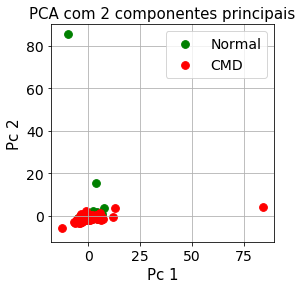

In [11]:
#Aplica o PCA para todo o dataset
X = pca_1.loc[:, feat].values

# Separa target
y = pca_1.loc[:,['TARGET']].values

# Standardizing the features
X = StandardScaler().fit_transform(X)

#dados normalizados
pca_1_normal = pd.DataFrame(data=X,columns = feat)

pca_1_y =  pd.DataFrame(data=y,columns = ['TARGET'])

#Faz de/para para gráfico
pca_1_y['TARGET'].replace(0,'Normal',inplace=True)
pca_1_y['TARGET'].replace(2,'CMD',inplace=True)

#pca_1_normal.tail(3)
#pca_1_y.tail(3)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

finalDf = pd.concat([principalDf, pca_1_y], axis = 1)

fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Pc 1', fontsize = 15)
ax.set_ylabel('Pc 2', fontsize = 15)
ax.set_title('PCA com 2 componentes principais', fontsize = 15)

targets = ['Normal','CMD']
colors = ['g','r']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['TARGET'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 60)
ax.legend(targets)
ax.grid()

finalDf.head(3)


total_taxa_explicada=0
for i in range(0,len(pca.explained_variance_ratio_)):
    total_taxa_explicada += pca.explained_variance_ratio_[i]

print("APLICANDO O PCA PARA 2 COMPONENTES:")
print(f'Variação explicada total_taxa_explicada: {round(total_taxa_explicada*100,2)}%')
print()

APLICANDO O PCA PARA 3 COMPONENTES:
Variação explicada total_taxa_explicada: 32.46%



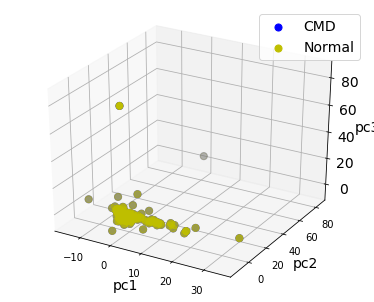

In [12]:
#Testa com 3 componentes
X = pca_1.loc[:, feat].values

# Separa target
y = pca_1.loc[:,['TARGET']].values

# Standardizing the features
X = StandardScaler().fit_transform(X)


pca_3 = PCA(n_components=3)
principalComponents_3 = pca_3.fit_transform(X)
principalDf_3 = pd.DataFrame(data = principalComponents_3
             , columns = ['pc1', 'pc2', 'p3'])

finalDf_3 = pd.concat([principalDf_3, pca_1_y], axis = 1)
#finalDf_3.head(3)

x = []
y = []
z = []
for ls in principalComponents_3:
    x.append(ls[0])
    y.append(ls[1])
    z.append(ls[2])

colors = ['b', 'y', 'r', 'c', 'm', 'g', 'k', 'w']
aux = 0

classes = pca_1['TARGET'].value_counts()

fig = plt.figure()
ax = Axes3D(fig)

for c in classes.index:
    if c == 0:
        lb = 'Normal'
    else:
        lb = 'CMD'
    nodes = np.where(y == c)
    ax.scatter(z, x, y, s=50, color = colors[aux], label = lb)
    aux = aux + 1
    


total_taxa_explicada=0
for i in range(0,len(pca_3.explained_variance_ratio_)):
    total_taxa_explicada += pca_3.explained_variance_ratio_[i]

print("APLICANDO O PCA PARA 3 COMPONENTES:")
print(f'Variação explicada total_taxa_explicada: {round(total_taxa_explicada*100,2)}%')
print()

plt.legend()
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
plt.xticks(color='k', size=10)
plt.yticks(color='k', size=10)
plt.show(True)

### Note que a partir de 100 componentes atingimos 100% de variação explicada dos dados

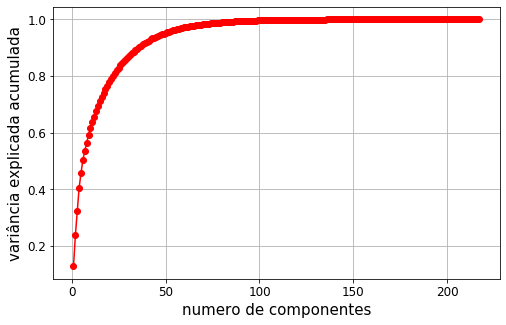

In [13]:
pca = PCA().fit(X)

ncomp = np.arange(1, np.shape(X)[0]+1)

plt.figure(figsize=(8,5))
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('numero de componentes', fontsize=15)
plt.ylabel('variância explicada acumulada', fontsize=15);
plt.xticks(color='k', size=12)
plt.yticks(color='k', size=12)
plt.grid(True)
plt.show(True)

In [14]:
# Verificando a influência dos atributos originais na composição dos elemntos do PCA
pca = PCA()
pca_result = pca.fit_transform(X)
var_exp = pca.explained_variance_ratio_

importances = var_exp
indices = np.argsort(importances)
attributes_rank = []

for i in indices:
    attributes_rank.append(pca_1.columns[i])


importancia =[]
for i in range(0,len(importances)):
    importancia.append(round(importances[i]*100,2))

DFimportancia = pd.DataFrame(data = importancia,columns=['importancia'])
DFimportancia.head(10)


attributes_rank.reverse()
feature = pd.DataFrame(data = attributes_rank,columns=['feature'])
#feature.head(3)

pca_importantes = pd.concat([feature, DFimportancia], axis = 1)
#pca_importantes.head()


#print("Selecionando features com importância acima de 2%")
#pca_importantes[pca_importantes['importancia']>0.0]
pca_importantes.loc[(pca_importantes['importancia']) > 0.18]




# plt.figure(figsize=(10, 30))
# plt.title('Feature Importances')
# plt.tight_layout()
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), attributes_rank, fontsize=20)
# plt.xlabel('Relative Importance',fontsize=20)
# plt.xticks(color='k', size=8)
# plt.yticks(color='k', size=8)
# plt.xlim([0.0, 0.25])
# plt.show()

,feature,importancia
0,idade,12.85
1,sexo,11.03
2,volume,8.58
3,massa,8.11
4,EDLEndo01,5.24
5,EDLEndo02,4.54
6,EDLEndo03,3.26
7,EDLEndo04,2.86
8,EDLEndo05,2.72
9,EDLEndo06,2.42


In [15]:
#Exporta dataset selecionado pela importancia do PCA:
colunas_pca = pca_importantes.loc[(pca_importantes['importancia']) > 0.18]
colunas_pca = colunas_pca['feature'].values

df_pca_features_importances = df_final_5[colunas_pca]


df_pca_features_importances = pd.concat([df_pca_features_importances,df_final_5['TARGET']],axis=1)


#exporta dataset final
df_pca_features_importances.to_csv("../RESULTADOS/df_pca_features_importances_20200510.csv", index = False)

df_pca_features_importances.head(3)

,idade,sexo,volume,massa,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,EDLEndo06,EDLEndo07,EDLEndo08,EDLEpi01,EDLEpi02,EDLEpi03,EDLEpi04,EDLEpi05,EDLEpi06,EDLEpi07,EDLEpi08,EDLTotal01,EDLTotal02,EDLTotal03,EDLTotal04,EDLTotal05,EDLTotal06,EDLTotal07,EDLTotal08,HoughEndo,HoughEpi,HoughParede,OctEndoL0001,OctEndoL0002,OctEndoL0003,OctEndoL0004,OctEndoL0005,OctEndoL0006,OctEndoL0007,OctEndoL0008,OctEndoL0101,OctEndoL0102,OctEndoL0103,OctEndoL0104,OctEndoL0105,OctEndoL0106,OctEndoL0107,OctEndoL0108,OctEndoL0201,OctEndoL0202,OctEndoL0203,OctEndoL0204,OctEndoL0205,OctEndoL0206,OctEndoL0207,OctEndoL0208,TARGET
0,29,1,74,110,0.0,0.0,21.6,0.0,15.9,0.0,168.1,0.0,1.7,0.0,46.8,0.0,44.1,0.0,242.6,0.0,0.8,0.0,58.5,0.0,52.3,0.0,357.6,0.0,366,494,746,4613.575024,620.772723,-128.478244,1741.736528,820.994081,-194.455451,-893.706161,-2880.546754,-31333.486453,-9348.234722,-19886.166426,-32202.444288,23774.492630,-2039.030884,-7820.588517,-54260.616692,-219267.224862,15977.771925,-5553.094041,-16143.381328,-6.003135e+04,24624.669491,-113545.216604,40978.682158,0
1,31,1,94,126,16.1,0.0,133.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,199.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,284.0,0.0,0.0,0.0,0.0,0.0,256,339,515,4110.284760,2581.904972,2115.149206,2678.449058,3075.982431,2261.445944,974.364946,3940.765949,-11670.857764,243.913824,1163.431317,-6205.439566,-36073.821620,2962.174569,-323.072481,-28566.597544,4707.986180,2502.968905,-2648.434630,221.229844,2.986295e+05,2869.809056,-308.321098,1010.412981,0
2,27,1,92,157,33.4,0.0,84.4,0.0,0.0,0.0,44.5,0.0,47.9,0.0,121.9,0.0,7.9,0.0,67.0,0.0,71.4,0.0,177.2,0.0,6.2,0.0,95.2,0.0,299,383,589,7747.108917,1453.378375,3308.912672,4968.969514,3351.210180,2858.188459,1027.522900,4534.789217,-77073.346335,13293.203263,-22844.708313,-36559.548984,-99966.813018,-28216.773291,-5935.553381,-68238.215053,-100882.502833,-60587.608753,-39991.724443,-59588.752974,-1.180746e+06,32290.156248,8770.034503,3233.746138,0


In [16]:
#TESTA COM N QUANTIDADES DE COMPONENTES PRINCIPAIS

#Faz loop para nomear coluna de atributos
n=53
coluna_pca = []
for i in range(0,n):
     coluna_pca.append('pc' + str(i+1))


pca_n = PCA(n_components=n)
principalComponents_n = pca_n.fit_transform(X)
principalDf_n = pd.DataFrame(data = principalComponents_n
             , columns = coluna_pca)
finalDf_n = pd.concat([principalDf_n, pca_1_y], axis = 1)
finalDf_n.head(3)


total_taxa_explicada=0
for i in range(0,len(pca_n.explained_variance_ratio_)):
    total_taxa_explicada += pca_n.explained_variance_ratio_[i]

print(f'APLICANDO O PCA PARA {n}  COMPONENTES:')
print(f'Variação explicada total_taxa_explicada: {round(total_taxa_explicada*100,2)}%')
print()

APLICANDO O PCA PARA 53  COMPONENTES:
Variação explicada total_taxa_explicada: 95.93%



In [17]:

#Faz de/para para ficar no mesmo padrão
finalDf_n['TARGET'].replace('Normal',0,inplace=True)
finalDf_n['TARGET'].replace('CMD',2,inplace=True)

#exporta dataset final
finalDf_n.to_csv("../RESULTADOS/df_pca_pc53_20200510.csv", index = False)

finalDf_n.head(3)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50,pc51,pc52,pc53,TARGET
0,-0.380187,-1.242178,1.656273,1.436952,-2.881585,-0.296026,-0.326761,0.075733,0.345819,-1.314147,-1.199202,-1.809258,-1.215745,0.554991,-0.898355,1.809270,-1.370106,-0.407834,0.516249,0.762144,0.760071,-0.386916,0.500378,0.208870,0.926711,-0.465457,-0.909819,-0.998979,-1.478004,0.549851,-2.259767,0.213992,0.706730,2.513976,2.486516,-2.578991,-1.261951,1.876831,0.916690,-0.081742,0.197356,-1.121502,0.061510,-0.025660,0.898264,-1.581132,1.258550,-0.079780,-0.450627,-0.456926,1.651611,1.360396,-2.070125,0
1,1.277585,0.944967,-4.019557,-4.309071,2.642900,3.040449,-0.974737,-0.335067,0.237036,-0.914938,0.257727,1.488411,-1.165772,-0.306347,-0.651339,-0.807757,-0.259162,0.775281,-0.656361,-0.507846,-0.305599,-0.479725,1.155522,0.283810,0.032281,-0.655921,0.714738,-0.647112,0.051865,-0.058322,0.067174,-0.139913,0.760286,-0.688209,-0.003650,-0.100075,-0.296336,-0.247673,-0.544368,-0.050359,-0.468136,-0.133010,-0.526666,0.263931,-0.127086,-0.104291,-0.267823,0.033702,0.355893,0.556578,-0.194596,-0.457636,-0.276006,0
2,4.148062,0.280303,-5.178178,-9.510744,1.350534,-1.065456,1.075355,1.860374,-5.151355,-0.044838,4.714648,-6.363567,10.561979,-1.521150,4.978594,-0.839396,2.483332,5.918821,5.194844,0.661127,11.032857,-4.213583,2.539784,-0.433891,7.199845,-0.853966,-6.963297,-3.054208,-2.739172,1.416659,0.753889,4.098556,0.353891,-0.342356,-4.057910,2.856439,-0.922986,2.636338,2.653224,-1.976895,-2.045781,-2.960312,0.877925,0.107856,0.123337,1.003921,-2.362706,0.629620,0.143497,0.649736,-0.499365,0.871762,-0.461576,0


## Conclusão PCA

Quando utilizamos até 3 componentes principais não conseguimos ter uma boa separação das classes, contudo quando verificamos a contribuição de cada caracteristica para a separação é possivel notar que 53 caracteristicas é o suficiente para representar mais de 90% do dataset origial que continha 330 features inicialmente.

# Seleção de caracteristicas por meio de algoritmos de seleção

Neste ponto testamos alguns algoritmos de redução de dimensionalidade. Dado que o resultado do PCA consinste em juntar caracteristicas para formar novas caracteristicas, entendemos que para ter uma aproximação do resultado da variação explicada acima, temos que no minimo considerar o mesmo "n".

In [18]:
#Total atributos menos o target
total_atributos = len(df_atual.columns) -1

#Para a seleção utilizaremos noss "D" como a raiz quadrada do nosso total
#D_caracteristicas = int(np.sqrt(total_atributos))
D_caracteristicas = n

print(f'TOTAL CARACTERISTICAS: {total_atributos}')
print(f'CARACTERISTICAS UTILIZADAS NA SELEÇÃO DE FEATURES: {D_caracteristicas}')

TOTAL CARACTERISTICAS: 328
CARACTERISTICAS UTILIZADAS NA SELEÇÃO DE FEATURES: 53


# Select Kbest
## Tipo Filtro

O SelectKBest remove todas as features, exceto os recursos de pontuação mais alta para isso conta com aseleção univariada. Ela funciona selecionando os melhores recursos com base em testes estatísticos univariados. Pode ser visto como uma etapa de pré-processamento para um estimador (tipo filtro).

Seus métodos para classificação são: chi2, f_classif, mutual_info_classif

Os métodos baseados no teste F estimam o grau de dependência linear entre duas variáveis aleatórias. Por outro lado, os métodos de informação mútua podem capturar qualquer tipo de dependência estatística, mas, sendo não paramétricos, exigem mais amostras para uma estimativa 

In [19]:
df_atual.head(3)
#df_atual.iloc[217:2]
#217, 2

,idade,sexo,volume,massa,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,EDLEndo06,EDLEndo07,EDLEndo08,EDLEpi01,EDLEpi02,EDLEpi03,EDLEpi04,EDLEpi05,EDLEpi06,EDLEpi07,EDLEpi08,EDLTotal01,EDLTotal02,EDLTotal03,EDLTotal04,EDLTotal05,EDLTotal06,EDLTotal07,EDLTotal08,HoughEndo,HoughEpi,HoughParede,OctEndoL0001,OctEndoL0002,OctEndoL0003,OctEndoL0004,OctEndoL0005,OctEndoL0006,OctEndoL0007,OctEndoL0008,OctEndoL0101,OctEndoL0102,OctEndoL0103,OctEndoL0104,OctEndoL0105,OctEndoL0106,OctEndoL0107,OctEndoL0108,OctEndoL0201,OctEndoL0202,OctEndoL0203,OctEndoL0204,OctEndoL0205,OctEndoL0206,OctEndoL0207,OctEndoL0208,OctEndoL0301,OctEndoL0302,OctEndoL0303,OctEndoL0304,OctEndoL0305,OctEndoL0306,OctEndoL0307,OctEndoL0308,OctEndoL0401,OctEndoL0402,OctEndoL0403,OctEndoL0404,OctEndoL0405,OctEndoL0406,OctEndoL0407,OctEndoL0408,OctEndoL0501,OctEndoL0502,OctEndoL0503,OctEndoL0504,OctEndoL0505,OctEndoL0506,OctEndoL0507,OctEndoL0508,OctEndoL0601,OctEndoL0602,OctEndoL0603,OctEndoL0604,OctEndoL0605,OctEndoL0606,OctEndoL0607,OctEndoL0608,OctEndoL0701,OctEndoL0702,OctEndoL0703,OctEndoL0704,OctEndoL0705,OctEndoL0706,OctEndoL0707,OctEndoL0708,OctEndoL0801,OctEndoL0802,OctEndoL0803,OctEndoL0804,OctEndoL0805,OctEndoL0806,OctEndoL0807,OctEndoL0808,OctEndoL0901,OctEndoL0902,OctEndoL0903,OctEndoL0904,OctEndoL0905,OctEndoL0906,OctEndoL0907,OctEndoL0908,OctEndoL1001,OctEndoL1002,OctEndoL1003,OctEndoL1004,OctEndoL1005,OctEndoL1006,OctEndoL1007,OctEndoL1008,OctEpiL0001,OctEpiL0002,OctEpiL0003,OctEpiL0004,OctEpiL0005,OctEpiL0006,OctEpiL0007,OctEpiL0008,OctEpiL0101,OctEpiL0102,OctEpiL0103,OctEpiL0104,OctEpiL0105,OctEpiL0106,OctEpiL0107,OctEpiL0108,OctEpiL0201,OctEpiL0202,OctEpiL0203,OctEpiL0204,OctEpiL0205,OctEpiL0206,OctEpiL0207,OctEpiL0208,OctEpiL0301,OctEpiL0302,OctEpiL0303,OctEpiL0304,OctEpiL0305,OctEpiL0306,OctEpiL0307,OctEpiL0308,OctEpiL0401,OctEpiL0402,OctEpiL0403,OctEpiL0404,OctEpiL0405,OctEpiL0406,OctEpiL0407,OctEpiL0408,OctEpiL0501,OctEpiL0502,OctEpiL0503,OctEpiL0504,OctEpiL0505,OctEpiL0506,OctEpiL0507,OctEpiL0508,OctEpiL0601,OctEpiL0602,OctEpiL0603,OctEpiL0604,OctEpiL0605,OctEpiL0606,OctEpiL0607,OctEpiL0608,OctEpiL0701,OctEpiL0702,OctEpiL0703,OctEpiL0704,OctEpiL0705,OctEpiL0706,OctEpiL0707,OctEpiL0708,OctEpiL0801,OctEpiL0802,OctEpiL0803,OctEpiL0804,OctEpiL0805,OctEpiL0806,OctEpiL0807,OctEpiL0808,OctEpiL0901,OctEpiL0902,OctEpiL0903,OctEpiL0904,OctEpiL0905,OctEpiL0906,OctEpiL0907,OctEpiL0908,OctEpiL1001,OctEpiL1002,OctEpiL1003,OctEpiL1004,OctEpiL1005,OctEpiL1006,OctEpiL1007,OctEpiL1008,OctParedeL0001,OctParedeL0002,OctParedeL0003,OctParedeL0004,OctParedeL0005,OctParedeL0006,OctParedeL0007,OctParedeL0008,OctParedeL0101,OctParedeL0102,OctParedeL0103,OctParedeL0104,OctParedeL0105,OctParedeL0106,OctParedeL0107,OctParedeL0108,OctParedeL0201,OctParedeL0202,OctParedeL0203,OctParedeL0204,OctParedeL0205,OctParedeL0206,OctParedeL0207,OctParedeL0208,OctParedeL0301,OctParedeL0302,OctParedeL0303,OctParedeL0304,OctParedeL0305,OctParedeL0306,OctParedeL0307,OctParedeL0308,OctParedeL0401,OctParedeL0402,OctParedeL0403,OctParedeL0404,OctParedeL0405,OctParedeL0406,OctParedeL0407,OctParedeL0408,OctParedeL0501,OctParedeL0502,OctParedeL0503,OctParedeL0504,OctParedeL0505,OctParedeL0506,OctParedeL0507,OctParedeL0508,OctParedeL0601,OctParedeL0602,OctParedeL0603,OctParedeL0604,OctParedeL0605,OctParedeL0606,OctParedeL0607,OctParedeL0608,OctParedeL0701,OctParedeL0702,OctParedeL0703,OctParedeL0704,OctParedeL0705,OctParedeL0706,OctParedeL0707,OctParedeL0708,OctParedeL0801,OctParedeL0802,OctParedeL0803,OctParedeL0804,OctParedeL0805,OctParedeL0806,OctParedeL0807,OctParedeL0808,OctParedeL0901,OctParedeL0902,OctParedeL0903,OctParedeL0904,OctParedeL0905,OctParedeL0906,OctParedeL0907,OctParedeL0908,OctParedeL1001,OctParedeL1002,OctParedeL1003,OctParedeL1004,OctParedeL1005,OctParedeL1006,OctParedeL1007,OctParedeL1008,TotalEndoSpharmL00,TotalEndoSpharmL01,TotalEndoSpharmL02,TotalEndoSpharmL03,TotalEndoSpharmL04,TotalEndoSpharmL05,TotalEndoSpharmL06,TotalEndoSpharmL07,TotalEndoSpharmL08,TotalEndoSpha

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif


f_classif = SelectKBest(score_func = f_classif,k=D_caracteristicas)
#f_classif = SelectKBest(mutual_info_classif,k=D_caracteristicas)



x = df_atual.drop(['TARGET'],axis=1)
y = df_atual['TARGET']


fit = f_classif.fit(x,y)


features = fit.transform(x)
#print(features)


colunas = fit.get_support(indices=True)
df_novo = df_atual.iloc[:,colunas]
df_novo


df_novo_c_target = pd.concat([df_novo,df_atual['TARGET']],axis=1)
df_novo_c_target.head(3)

,idade,sexo,volume,massa,EDLEndo07,EDLEpi07,EDLTotal07,HoughEndo,HoughEpi,HoughParede,OctEndoL0003,OctEndoL0006,OctEndoL0007,OctEndoL0103,OctEndoL0104,OctEndoL0107,OctEndoL0108,OctEndoL0201,OctEndoL0605,OctEpiL0003,OctEpiL0006,OctEpiL0007,OctEpiL0008,OctEpiL0103,OctEpiL0104,OctEpiL0105,OctEpiL0106,OctEpiL0107,OctEpiL0108,OctEpiL0201,OctEpiL0303,OctEpiL0405,OctEpiL0605,OctParedeL0003,OctParedeL0006,OctParedeL0007,OctParedeL0008,OctParedeL0103,OctParedeL0104,OctParedeL0105,OctParedeL0107,OctParedeL0108,OctParedeL0201,OctParedeL0306,OctParedeL0405,OctParedeL0505,OctParedeL0605,OctParedeL0706,TotalEndoSpharmL00,TotalEndoSpharmL01,TotalEpiSpharmL01,TotalParedeSpharmL00,TotalParedeSpharmL01,TARGET
0,29,1,74,110,168.1,242.6,357.6,366,494,746,-128.478244,-194.455451,-893.706161,-19886.166426,-32202.444288,-7820.588517,-54260.616692,-219267.224862,-1.375652e+07,-563.890608,-573.559580,-3022.077940,-3383.373740,-21243.327092,-44398.117462,96474.667339,-1712.268189,-9197.182517,-66096.296461,-229831.248142,-15482.676754,-7.330628e+06,-1.609391e+08,-459.994636,-548.613679,-3535.592190,-5373.761801,-29250.421457,-67700.720824,83570.722642,-21211.275738,-109599.536721,-332156.170372,325187.365882,-6.778207e+06,6.978332e+06,-1.045470e+08,3.600472e+06,3557.256128,-186495.627484,-242037.975418,6551.098967,-370009.497215,0
1,31,1,94,126,0.0,0.0,0.0,256,339,515,2115.149206,2261.445944,974.364946,1163.431317,-6205.439566,-323.072481,-28566.597544,4707.986180,-1.147495e+07,3221.529942,1984.326360,1078.774627,4908.729136,5801.917289,-8604.419733,-145526.253124,-702.151936,406.887744,-40749.775196,7721.530756,3517.351695,5.593916e+05,6.532277e+06,4821.950987,3470.580911,2096.446944,8013.405454,5202.336509,-12389.316465,-191927.234222,-447.330868,-61076.786002,14824.657268,1358.241039,8.794558e+05,2.802212e+06,1.310122e+07,-7.238448e+03,21738.347266,-79774.239027,-100436.709772,42009.233272,-141806.576054,0
2,27,1,92,157,44.5,67.0,95.2,299,383,589,3308.912672,2858.188459,1027.522900,-22844.708313,-36559.548984,-5935.553381,-68238.215053,-100882.502833,1.997771e+08,4179.024165,3732.801512,1458.038092,5260.432514,-25787.722222,-48099.795798,-174208.250697,50004.429238,-9295.768324,-80638.804915,-215768.411547,488.032183,4.050334e+06,1.272164e+08,6469.876726,5740.225035,2205.085028,9122.787329,-38254.328741,-73370.696031,-222761.787716,-16559.875843,-134506.113098,-120672.982748,684766.534657,8.208411e+06,-7.962915e+07,3.392812e+08,5.187556e+07,28042.192172,-288023.922395,-376716.803442,57277.473507,-570967.303337,0


In [23]:
#exporta dataset final
df_novo_c_target.to_csv("../RESULTADOS/df_kbest_fclassif_20200510.csv", index = False)

# Features Importances (com RandomForest)
# Tipo embutido

Para este caso escolhemos o classificador e selecionamos as caracteristicas manualmente de acordo com a importancia dada pelo classificador em relação à classe alvo.

In [24]:
from sklearn.ensemble import RandomForestClassifier

x = df_atual.drop(['TARGET'],axis=1)
y = df_atual['TARGET']

# Treinando o modelo na base inteira
model  = RandomForestClassifier()
model.fit(x, y)

# Verificando a importância decada feature
#model.feature_importances_


feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

feat_select = feature_importances[feature_importances['importance']>0.004]


pd.set_option('display.max_rows',328)
feature_importances


print(f'TOTAL CARACTERISTICAS SELECIONADAS: {len(feat_select)}')

TOTAL CARACTERISTICAS SELECIONADAS: 51


In [25]:
df_novo_c_target = pd.concat([df_atual.loc[:,feat_select.index],df_atual['TARGET']],axis=1)
df_atual.loc[:,feat_select.index].head(3)

,idade,HoughParede,OctEndoL0007,OctParedeL0007,massa,volume,HoughEndo,HoughEpi,OctParedeL0107,OctEpiL0107,OctEndoL0107,OctEpiL0007,EDLEndo07,OctParedeL0001,OctEndoL0506,EDLTotal07,OctParedeL0503,OctEpiL0003,OctParedeL0006,EDLEpi07,OctEpiL0104,OctEpiL0405,OctEpiL0407,OctParedeL0106,OctEpiL0602,OctParedeL0104,sexo,OctEndoL0006,OctParedeL0807,OctEndoL0207,OctEndoL0104,TotalEndoSpharmL00,TotalEpiSpharmL09,OctEpiL0005,OctParedeL0604,OctParedeL0905,OctEpiL0603,OctEpiL0103,OctEpiL0402,OctParedeL0108,OctEndoL0904,OctParedeL0003,TotalParedeSpharmL10,OctEndoL0206,OctEndoL0607,OctParedeL0904,OctParedeL0303,TotalEndoSpharmL05,OctParedeL0403,OctEndoL0003,OctParedeL0005
0,29,746,-893.706161,-3535.592190,110,74,366,494,-21211.275738,-9197.182517,-7820.588517,-3022.077940,168.1,9443.951606,7.572437e+05,357.6,4268.329060,-563.890608,-548.613679,242.6,-44398.117462,-7.330628e+06,-128282.498981,-2763.753505,-80113.708792,-67700.720824,1,-194.455451,3.845807e+05,-113545.216604,-32202.444288,3557.256128,-1.087166e+06,2548.155210,154376.263914,-3.679902e+08,-7676.168736,-21243.327092,6974.476460,-109599.536721,4.126807e+05,-459.994636,-2.381297e+06,24624.669491,-959415.310789,1.145260e+05,-21659.388878,92353.935832,12432.371529,-128.478244,2902.701702
1,31,515,974.364946,2096.446944,126,94,256,339,-447.330868,406.887744,-323.072481,1078.774627,0.0,9687.053799,9.637125e+02,0.0,-3209.523034,3221.529942,3470.580911,0.0,-8604.419733,5.593916e+05,876.751390,755.222243,-590.474840,-12389.316465,1,2261.445944,3.041517e+02,-308.321098,-6205.439566,21738.347266,9.205317e+03,5629.550658,48773.084412,3.555992e+07,6159.241354,5801.917289,-2784.745090,-61076.786002,3.456704e+05,4821.950987,3.576759e+04,2869.809056,2271.474354,-2.524051e+04,4719.614497,15361.770195,2143.297600,2115.149206,7929.919120
2,27,589,1027.522900,2205.085028,157,92,299,383,-16559.875843,-9295.768324,-5935.553381,1458.038092,44.5,14356.949027,3.165806e+06,95.2,-709685.052575,4179.024165,5740.225035,67.0,-48099.795798,4.050334e+06,-5692.872331,56620.924849,-378.944633,-73370.696031,1,2858.188459,-1.209641e+06,8770.034503,-36559.548984,28042.192172,7.557785e+05,5343.399719,-260377.416048,2.073313e+09,63994.664577,-25787.722222,836.975253,-134506.113098,-6.195056e+06,6469.876726,8.794934e+06,32290.156248,78786.965184,3.561680e+06,4158.068376,110638.915570,-196372.996427,3308.912672,7429.050279


In [28]:
#exporta dataset final
df_novo_c_target.head(3)
df_novo_c_target.to_csv("../RESULTADOS/df_randon_forest_importances_20200510.csv", index = False)

# RFE: Recursive feature elimination
## Tipo Camada
A eliminação recursiva de recursos (RFE) seleciona subconjuntos recursivamente, considerando conjuntos cada vez menores de features. Primeiro, o estimador é treinado no conjunto inicial de recursos e a importância de cada feature é obtida por meio de um atributo "coef_" ou através de um atributo "feature_importances_". Em seguida, os recursos menos importantes são removidos do conjunto atual de recursos. Esse procedimento é repetido recursivamente no conjunto removido até que o número desejado de recursos a serem selecionados seja finalmente atingido.

O RFECV executa o RFE em um loop de validação cruzada para encontrar o número ideal de recursos.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE



x = df_atual.drop(['TARGET'],axis=1)
y = df_atual['TARGET']

model = LogisticRegression(max_iter=80000)

rfe = RFE(model,D_caracteristicas)

fit = rfe.fit(x,y)


features = fit.get_support(indices=True)


df_novo_c_target = pd.concat([df_atual.iloc[:,features],df_atual['TARGET']],axis=1)
df_atual.iloc[:,features].head(3)

,OctEndoL0001,OctEndoL0007,OctEndoL0103,OctEndoL0106,OctEndoL0107,OctEndoL0108,OctEndoL0202,OctEndoL0206,OctEndoL0303,OctEndoL0308,OctEndoL0407,OctEndoL0808,OctEndoL1003,OctEpiL0007,OctEpiL0107,OctEpiL0207,OctEpiL0303,OctEpiL0306,OctEpiL0307,OctEpiL0308,OctEpiL0403,OctEpiL0503,OctEpiL0507,OctEpiL0508,OctEpiL0702,OctEpiL0703,OctEpiL0704,OctEpiL0707,OctEpiL0804,OctEpiL0807,OctEpiL0907,OctEpiL1007,OctParedeL0007,OctParedeL0008,OctParedeL0105,OctParedeL0107,OctParedeL0108,OctParedeL0201,OctParedeL0202,OctParedeL0203,OctParedeL0207,OctParedeL0208,OctParedeL0308,OctParedeL0604,OctParedeL0608,OctParedeL1007,TotalEndoSpharmL00,TotalEndoSpharmL06,TotalEndoSpharmL08,TotalEpiSpharmL00,TotalEpiSpharmL06,TotalParedeSpharmL00,TotalParedeSpharmL04
0,4613.575024,-893.706161,-19886.166426,-2039.030884,-7820.588517,-54260.616692,15977.771925,24624.669491,-5880.112340,19976.371575,49145.962702,5.049996e+06,-7.106150e+06,-3022.077940,-9197.182517,127569.837862,-15482.676754,398185.489452,-19539.979114,38503.866571,5634.678665,9297.311235,-54328.797737,-111270.744987,-20228.538502,-6.633835e+04,-4.973653e+04,-150848.839100,-1.453088e+05,-112748.370530,1.045923e+07,827675.086459,-3535.592190,-5373.761801,83570.722642,-21211.275738,-109599.536721,-332156.170372,9467.957979,769.661361,157302.541140,98171.881180,63363.665806,154376.263914,1.260232e+06,2.458556e+05,3557.256128,1.955184e+06,2.449197e+06,4299.591131,449252.577604,6551.098967,62266.013014
1,4110.284760,974.364946,1163.431317,2962.174569,-323.072481,-28566.597544,2502.968905,2869.809056,4139.541401,13401.337704,2985.453490,2.776359e+05,1.034548e+05,1078.774627,406.887744,-1850.317486,3517.351695,1195.952957,-1602.984605,-6000.541284,2863.977147,-2416.926657,578.305067,-47955.657021,-443.506754,2.173953e+03,2.325685e+03,1325.641217,-7.239166e+04,-2004.206956,8.942521e+01,-1729.138559,2096.446944,8013.405454,-191927.234222,-447.330868,-61076.786002,14824.657268,3257.736046,-4956.120414,-3561.369974,2080.320884,1086.432610,48773.084412,-1.031119e+04,-4.512065e+03,21738.347266,2.731124e+04,2.586300e+04,27544.700775,23942.841793,42009.233272,4403.174271
2,7747.108917,1027.522900,-22844.708313,-28216.773291,-5935.553381,-68238.215053,-60587.608753,32290.156248,14999.522569,-22460.395544,-8050.546312,-3.367420e+06,-1.025517e+08,1458.038092,-9295.768324,3954.056214,488.032183,524916.727009,-3623.152403,-24240.384341,-278832.501035,-150104.893495,4617.309304,418936.507340,-619.179356,-2.097642e+06,-2.363146e+06,-252301.970134,1.029161e+06,362904.412344,5.500791e+04,610513.896589,2205.085028,9122.787329,-222761.787716,-16559.875843,-134506.113098,-120672.982748,-50713.522216,-16249.510717,-8532.007783,-42067.633681,-43222.654578,-260377.416048,5.832552e+05,2.481174e+06,28042.192172,-1.137047e+06,-9.288914e+06,35120.956506,36310.265852,57277.473507,67138.663165


In [37]:
#exporta dataset final
df_novo_c_target.to_csv("../RESULTADOS/df_RFE_20200510.csv", index = False)

# Sequential Forward Selection (SFS)
## Tipo: Heurístico
A cada iteração novas
características são adicionadas ao subconjunto
corrente

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier

#Método de distancia utilizada
knn = KNeighborsClassifier(n_neighbors=30)


x = df_atual.drop(['TARGET'],axis=1)
y = df_atual['TARGET']

sfs1 = SFS(knn, 
           k_features=D_caracteristicas, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(x, y)
sfs1.k_feature_names_
#sfs1.k_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 328 out of 328 | elapsed:    4.6s finished

[2020-05-10 14:18:41] Features: 1/53 -- score: 0.8110599078341014[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 327 out of 327 | elapsed:    5.0s finished

[2020-05-10 14:18:46] Features: 2/53 -- score: 0.8433179723502304[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 326 out of 326 | elapsed:    5.6s finished

[2020-05-10 14:18:51] Features: 3/53 -- score: 0.8433179723502304[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

('idade',
 'sexo',
 'volume',
 'massa',
 'EDLEndo01',
 'EDLEndo02',
 'EDLEndo03',
 'EDLEndo04',
 'EDLEndo05',
 'EDLEndo06',
 'EDLEndo07',
 'EDLEndo08',
 'EDLEpi01',
 'EDLEpi02',
 'EDLEpi03',
 'EDLEpi04',
 'EDLEpi05',
 'EDLEpi06',
 'EDLEpi07',
 'EDLEpi08',
 'EDLTotal01',
 'EDLTotal02',
 'EDLTotal03',
 'EDLTotal04',
 'EDLTotal05',
 'EDLTotal06',
 'EDLTotal07',
 'EDLTotal08',
 'HoughEndo',
 'HoughEpi',
 'HoughParede',
 'OctEndoL0001',
 'OctEndoL0002',
 'OctEndoL0003',
 'OctEndoL0004',
 'OctEndoL0005',
 'OctEndoL0006',
 'OctEndoL0007',
 'OctEndoL0008',
 'OctEndoL0101',
 'OctEndoL0107',
 'OctEpiL0001',
 'OctEpiL0002',
 'OctEpiL0004',
 'OctEpiL0006',
 'OctEpiL0007',
 'OctEpiL0008',
 'OctEpiL0107',
 'OctEpiL0204',
 'OctParedeL0002',
 'OctParedeL0005',
 'OctParedeL0007',
 'OctParedeL0107')

In [39]:
df_novo_c_target = pd.concat([df_atual.iloc[:,list(sfs1.k_feature_idx_)],df_atual['TARGET']],axis=1)
df_atual.iloc[:,list(sfs1.k_feature_idx_)].head(3)
#df_novo_c_target

,idade,sexo,volume,massa,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,EDLEndo06,EDLEndo07,EDLEndo08,EDLEpi01,EDLEpi02,EDLEpi03,EDLEpi04,EDLEpi05,EDLEpi06,EDLEpi07,EDLEpi08,EDLTotal01,EDLTotal02,EDLTotal03,EDLTotal04,EDLTotal05,EDLTotal06,EDLTotal07,EDLTotal08,HoughEndo,HoughEpi,HoughParede,OctEndoL0001,OctEndoL0002,OctEndoL0003,OctEndoL0004,OctEndoL0005,OctEndoL0006,OctEndoL0007,OctEndoL0008,OctEndoL0101,OctEndoL0107,OctEpiL0001,OctEpiL0002,OctEpiL0004,OctEpiL0006,OctEpiL0007,OctEpiL0008,OctEpiL0107,OctEpiL0204,OctParedeL0002,OctParedeL0005,OctParedeL0007,OctParedeL0107
0,29,1,74,110,0.0,0.0,21.6,0.0,15.9,0.0,168.1,0.0,1.7,0.0,46.8,0.0,44.1,0.0,242.6,0.0,0.8,0.0,58.5,0.0,52.3,0.0,357.6,0.0,366,494,746,4613.575024,620.772723,-128.478244,1741.736528,820.994081,-194.455451,-893.706161,-2880.546754,-31333.486453,-7820.588517,6639.302476,-28.993812,2924.309595,-573.559580,-3022.077940,-3383.373740,-9197.182517,-32152.070685,439.698626,2902.701702,-3535.592190,-21211.275738
1,31,1,94,126,16.1,0.0,133.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,199.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,284.0,0.0,0.0,0.0,0.0,0.0,256,339,515,4110.284760,2581.904972,2115.149206,2678.449058,3075.982431,2261.445944,974.364946,3940.765949,-11670.857764,-323.072481,7194.340056,868.636842,3998.522947,1984.326360,1078.774627,4908.729136,406.887744,741.217711,1908.922750,7929.919120,2096.446944,-447.330868
2,27,1,92,157,33.4,0.0,84.4,0.0,0.0,0.0,44.5,0.0,47.9,0.0,121.9,0.0,7.9,0.0,67.0,0.0,71.4,0.0,177.2,0.0,6.2,0.0,95.2,0.0,299,383,589,7747.108917,1453.378375,3308.912672,4968.969514,3351.210180,2858.188459,1027.522900,4534.789217,-77073.346335,-5935.553381,9616.293103,311.170515,7141.339712,3732.801512,1458.038092,5260.432514,-9295.768324,-45873.413108,1282.719799,7429.050279,2205.085028,-16559.875843


In [41]:
#exporta dataset final
df_novo_c_target.to_csv("../RESULTADOS/df_SFS_20200510.csv", index = False)

# Sequential Backward Selection (SBS)
## Tipo: Heurístico
A cada iteração
características são deletadas do subconjunto
corrente

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier


#Método de distancia utilizada
knn = KNeighborsClassifier(n_neighbors=30)

x = df_atual.drop(['TARGET'],axis=1)
y = df_atual['TARGET']

# Sequential Backward Selection
sbs = SFS(knn, 
          k_features=D_caracteristicas, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sbs = sbs.fit(x, y)

sbs.k_feature_names_
#sbs.k_score_

In [ ]:
df_novo_c_target = pd.concat([df_atual.iloc[:,list(sbs.k_feature_idx_)],df_atual['TARGET']],axis=1)
df_atual.iloc[:,list(sbs.k_feature_idx_)].head(3)

In [ ]:
df_atual.iloc[:,list(sbs.k_feature_idx_)].columns

# K Folds

In [ ]:
df_atual['TARGET'].value_counts()

In [ ]:
from sklearn.model_selection import StratifiedKFold

X = df_atual.drop(['TARGET'],axis=1).values
y = df_atual['TARGET']

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)
i=0
for train_index, test_index in skf.split(X,y):   
    
    i=i+1
    df_treinoy = df_atual.iloc[test_index]
    k_group = df_treinoy['TARGET'].value_counts()
    
    #Sem Anomalia
    NORMAL = k_group[0]
    
    #Cardimiopatia Dilatada
    CMD = k_group[2]

    #TOTAL
    total = NORMAL + CMD

    part_NORMAL = round(NORMAL/(NORMAL+CMD) * 100, 2)
    part_CMD = round(CMD/(NORMAL+CMD) * 100, 2)

    print(f'k = {i}: NORMAL: {NORMAL}| CMD: {CMD}| Total: {total}|',f'NORMAL: {part_NORMAL}% CMD: {part_CMD}%')
    print()